### 1. Import all necessary libraries

In [1]:
import sys
import os
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn 

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### 2. Read all stock data

In [2]:
df = pd.read_csv('/Users/jiviteshshah/University/Machine learning/Project/stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

In [3]:
df.Date = pd.to_datetime(df.Date)

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


### 3. Data Cleaning

In [5]:
df.isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [6]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,NaN,201.66,NaN,201.17,1833625,MMM
5933,2017-07-31,NaN,85.70,NaN,85.23,3079797,AXP
11972,2017-07-31,NaN,NaN,NaN,242.46,5777271,BA
14992,2017-07-31,NaN,NaN,NaN,113.95,4486013,CAT
18012,2017-07-31,NaN,110.00,NaN,109.19,7561205,CVX
24051,2017-07-31,NaN,NaN,45.79,45.84,13622891,KO
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS
27071,2017-07-31,NaN,110.14,NaN,109.93,6815349,DIS
30091,2017-07-31,NaN,80.39,NaN,80.04,12820175,XOM
33111,2017-07-31,NaN,25.69,NaN,25.61,30616287,GE


In [7]:
gdf = df[df.Name == 'AABA']
cdf = df[df.Name == 'CAT']
cdf[~cdf.Date.isin(gdf.Date)]

,Date,Open,High,Low,Close,Volume,Name
13147,2010-04-01,63.29,64.2,63.29,63.99,7830447,CAT


In [8]:
df.set_index('Date', inplace=True)

#Backfill `Open` column
values = np.where(df['2017-07-31']['Open'].isnull(), df['2017-07-28']['Open'], df['2017-07-31']['Open'])
df['2017-07-31']= df['2017-07-31'].assign(Open=values.tolist())

values = np.where(df['2017-07-31']['Close'].isnull(), df['2017-07-28']['Close'], df['2017-07-31']['Close'])
df['2017-07-31']= df['2017-07-31'].assign(Close=values.tolist())

values = np.where(df['2017-07-31']['High'].isnull(), df['2017-07-28']['High'], df['2017-07-31']['High'])
df['2017-07-31']= df['2017-07-31'].assign(High=values.tolist())

values = np.where(df['2017-07-31']['Low'].isnull(), df['2017-07-28']['Low'], df['2017-07-31']['Low'])
df['2017-07-31']= df['2017-07-31'].assign(Low=values.tolist())

df.reset_index(inplace=True)

In [9]:
missing_data_stocks = ['CSCO','AMZN','INTC','AAPL','MSFT','MRK','GOOGL', 'AABA']
columns = df.columns.values

In [10]:
for stock in missing_data_stocks:
    tdf = df[(df.Name == stock) & (df.Date == '2014-03-28')].copy()
    tdf.Date = '2014-04-01'
    pd.concat([df, tdf])
print("Complete")

Complete


In [11]:
df[(df.Name == 'CSCO') & (df.Date == '2014-04-01')]

,Date,Open,High,Low,Close,Volume,Name
20192,2014-04-01,22.33,23.31,22.3,23.1,80113826,CSCO


In [12]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS


In [13]:
df = df[~((df.Date == '2012-08-01') & (df.Name == 'DIS'))]

In [14]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [15]:
ibm_data = df[df.Name == 'AAPL'].copy()

In [16]:
ibm_data.drop(['Name'],1,inplace=True)

In [17]:
ibm_data.head()

,Date,Open,High,Low,Close,Volume
6040,2006-01-03,10.34,10.68,10.32,10.68,201853036
6041,2006-01-04,10.73,10.85,10.64,10.71,155225609
6042,2006-01-05,10.69,10.70,10.54,10.63,112396081
6043,2006-01-06,10.75,10.96,10.65,10.90,176139334
6044,2006-01-09,10.96,11.03,10.82,10.86,168861224


### 3. Visualize

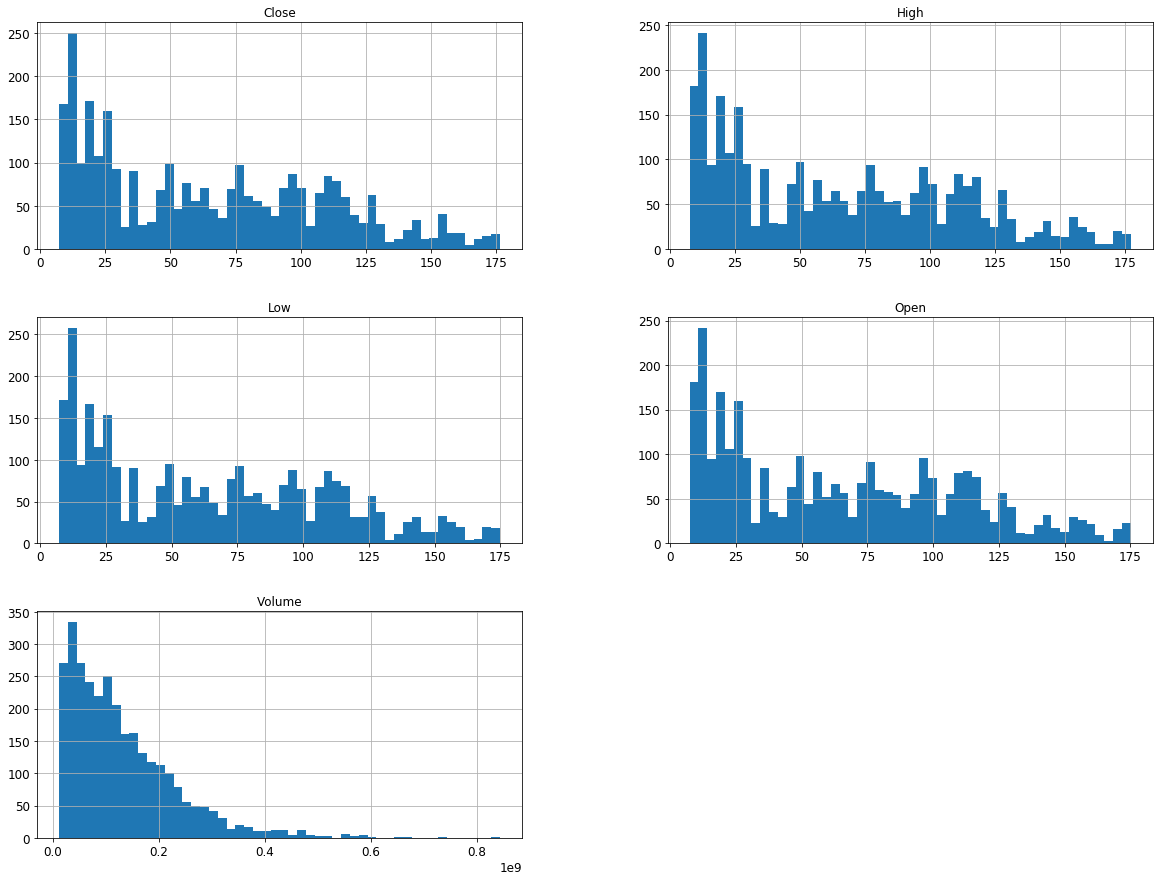

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
ibm_data.hist(bins=50, figsize=(20,15))
plt.show()

### 4. Split data

In [19]:
ibm_data.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [20]:
# 2017 would be training and before that would be test
ibm_train = ibm_data[ibm_data['Date'] < '2017-01-01']
ibm_train = ibm_train.drop("Date", axis = 1)

In [21]:
ibm_test = ibm_data[ibm_data['Date'] >= '2017-01-01']
ibm_test = ibm_test.drop("Date", axis = 1)

In [22]:
ibm_train_X = ibm_train.drop("Close", axis=1) # drop labels for training set
ibm_train_y = ibm_train["Close"].copy()

In [23]:
ibm_test_X = ibm_test.drop("Close", axis=1) # drop labels for training set
ibm_test_y = ibm_test["Close"].copy()

No need to normalize / scale data. It is important only for deep learning algorithms

### 5. Models

RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [25]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(ibm_train_X, ibm_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
train_predictions = forest_reg.predict(ibm_train_X)
forest_mse = mean_squared_error(ibm_train_y, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.2274223570104929

Lasso

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [28]:
alphas = np.arange(100,1000)
grid_lasso = GridSearchCV(estimator=Lasso(random_state=42),param_grid=dict(alpha=alphas), cv=10, scoring='r2')
grid_lasso.fit(ibm_train_X, ibm_train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([100, 101, ..., 998, 999])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [29]:
lasso_predictions = grid_lasso.predict(ibm_train_X)
lasso_mse = mean_squared_error(ibm_train_y, lasso_predictions)
lasso_mse = np.sqrt(lasso_mse)
lasso_mse

3.5327543875635263

Ridge

In [30]:
from sklearn.linear_model import Ridge

In [31]:
grid_ridge = GridSearchCV(estimator=Ridge(random_state=42),param_grid=dict(alpha=alphas), cv=10, scoring='r2')
grid_ridge.fit(ibm_train_X, ibm_train_y)

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2288622953463597e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5233715681711086e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3436711695071245e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8821506447154823e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.161141334102919e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8468956788421376e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8576846920634915e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9380163959233856e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8510257549163214e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2740976872420265e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5745096587039473e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3907534875794485e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.640219733398605e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9218013643093288e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.20213126637569e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9359595469809355e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.216768329696692e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.903981327450037e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4378227314072794e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9098527499609072e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.990239711212463e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3354762272481787e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6438922829982416e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4546301817053205e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9460294215108426e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3516262580600685e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6621474469605113e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2723794262194232e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9610437273438542e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.367775408777408e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2870115093861802e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9760565887887825e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.383923700666828e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9693217413177423e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7350096679575752e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.018050429099535e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5352855234164136e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.989446799847894e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0699113738151838e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7497538996671064e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.552084696016494e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0031664566871863e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0330929663248263e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.445279732499986e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.768001628646629e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.108358879406869e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0215585909213184e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.969720616137673e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.11934225486417e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0325534931390846e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9806806783227676e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.069106384440978e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4840251478007618e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8117914139424256e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0841099268697757e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.500167826381134e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.830035239688332e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0991123095798127e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.516309797314599e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.848277974913668e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1141135620216094e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5324510765576026e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.86651964434104e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.129113712665755e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5485916796007935e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.884760271953415e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5647316214776902e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.902999881028672e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.693148782204282e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.465454134981589e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.159110817749154e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5808709167855963e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.174107824564598e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5970095796981342e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9394761332816357e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1891038344006114e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6131476239819274e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9577128196943206e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1644359909056466e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1121370431581775e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2188707229811456e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.5210124609723113e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.216094216225887e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.642194587205539e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.195150765765685e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2757852981500455e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1891534485814312e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2584467125847348e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.550250102768653e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.246079995314631e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.278232318372965e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.5707150709784883e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2670679170891185e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2923639560086517e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.585332234650735e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2820582555714624e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2554583556256213e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3361358608425917e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2495615420127285e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2691628726894188e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.349849772918169e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2632883357650038e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.324026799176943e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7583642722867627e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1218033535867117e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3745329292834295e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2879945124615786e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2352847662927576e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.154613581060986e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9247368372652096e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3075322571649597e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3992137371357562e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3126981367971305e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2599051414965447e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4101822535772246e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3236767315225436e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2708466312629213e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.829343819031715e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.202001908619483e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9683507747141937e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4049490343569835e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.845474269365848e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.220226906954635e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.99854200028352e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3678178112504467e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4485686428548705e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.317342049618173e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4308160967117132e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7285536452801553e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.884185535797281e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2639641118493777e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.025376639872775e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.90031449566636e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2821868174138163e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0421473585857745e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.495173862408462e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4087452611107586e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3556255525346903e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3665626157077156e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4816604524961845e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7811547038031482e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3774992130690737e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.492958166569431e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.792843117987597e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4500087895918944e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5308083806138212e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4444114710880214e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3623592147594176e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1159303893286494e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4637055578563883e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.376934751044118e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.129344117674797e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4746626343439116e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.543793479134974e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8454379740944365e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5487619318142098e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0164310890606885e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.413371967185944e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.162876679273074e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.575720677526531e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.029331712545449e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.427946218263877e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4622428557212296e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5805035937406545e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8834202411021834e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5267024088106106e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4731756838302482e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5917983240130663e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.06803221133994e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.471666862031114e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.216523741691218e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.229934574114012e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.556831579609367e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6376892229786958e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5087046561937696e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6285040405484576e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9330859290505026e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9447714351512867e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6505969512047622e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.109955510628631e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.956456743395856e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6625759705302082e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.122854534675249e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5980050154399498e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5442296276187646e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6652065806343293e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.689527627812813e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1518765838971475e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.566384607143376e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6199414894499884e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.566089244417021e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.687791246027342e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1776731051252386e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.59552584160531e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3305046172357676e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.728102893927211e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6418767178299934e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5879474626073956e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6610690492396406e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.607072288649471e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7301345208804924e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7583972601126063e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2260394914685373e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6501624403823885e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.755538695503305e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0645370255247454e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.773367680850843e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.255058062042141e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6829424598106446e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.410947364029059e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0908245752623888e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8003133743927295e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2711790948919344e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4411105661335764e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7293396536722692e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.810280276860701e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4545159592739857e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7402906432075762e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8212361394903247e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4679210660155214e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7512414234616448e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.832191749448627e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7630655854498656e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.484677052547255e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7649296087393507e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.866175116269834e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3421084196982596e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.781274282464286e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.784427706362114e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7299944902146983e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.857142887597356e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7436502068932613e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.871253088361996e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.184284995754634e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9080832792528754e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3872426536424076e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.832256555883842e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.908874222135439e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8227992204058735e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7682294135789862e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.578502754650874e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.841577729268984e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.922566319413412e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8552639145357693e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9362580675723647e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.85020563884596e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8611677979994803e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.806461054267284e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9361556560549795e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9474423545135084e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.263135077881486e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.976926338247382e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.988898310589045e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4742819020845626e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.930571286236475e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9017948426261044e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.982807474753432e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.896793252048617e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.907754460292321e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.852880996785525e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9841227455996694e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9187154524609936e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.863802693813851e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.995408605192069e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.934638317556915e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.015663603789925e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.929676231371528e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.940636799791889e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8856453770861913e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.017979754864835e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3478193829590494e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0637184995618117e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5548679528888443e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.567761229760741e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.036157395383414e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7359685227733845e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.050720143101296e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.749368409526104e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9811640283672765e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.762768080919772e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.992110835448796e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.073157529992088e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.005794125809614e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.086845784834675e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.000916282982685e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.094152008296769e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4149784343225552e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.132546411527375e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4295777511707162e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.147508204952249e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.645118198554351e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.441257086557363e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.159477442071273e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6580105925256694e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4529363185532864e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.171446505995148e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6709028664700056e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.859909496326248e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.071470651664581e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.152545465211508e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.485053684992683e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.204360556861578e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7063560127270984e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.038519492288685e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1759580139163253e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4996522408007513e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.190061649560859e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5142506458307472e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.234281337185599e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5259292630099265e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.246249367835906e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7514769480861537e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.261858796874783e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.943643842468812e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.139878251048931e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.148850970619521e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0931078215115785e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.232371133385922e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.8030420846786694e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.301898178463396e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.980484686142932e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.819155841928392e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.320097490581031e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9972300840016136e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.192677505271514e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1367751927505186e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.2774989802750516e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.360135105440982e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.034069015902355e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.213752666308539e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.166794892131368e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3085230720784903e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.636871631002701e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.400171552266423e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.070906683812811e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.243848028618223e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3395461413302e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.6689850954182428e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3928455152141346e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.27394249520548e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.355082344461209e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.26936799853051e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linal

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.425751944606301e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.944837783216835e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.462043847267256e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.480241085236143e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.144578382620332e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.304036093559233e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.401589340452003e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7332102404275984e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4586573817481275e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.181412487179542e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.334128850092717e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.415286385569305e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.7653219621455394e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.491561858651554e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.015731348773252e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.364220790189295e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.445386912745396e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3597442132822736e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.52446540600333e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.051177136359824e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.5821416420530276e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.389867596817189e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.333245812944882e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4805480644568735e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.622172231006671e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.27516706499848e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.410724966356263e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5115660164387855e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.847058490380513e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5753145824854825e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3119973585095435e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.440814936247081e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.522002187851559e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.542583135698296e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8791683744361075e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.60821589376789e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.470904172147164e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.55209945050067e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.466541037585023e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.7204251386131434e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.365566910304326e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4845808607053866e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.189732006221778e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.738619522463049e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.382306973768767e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.395698883204531e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5091985352612086e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.590403816130808e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6130736217380316e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9521436258393884e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.682988552895681e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5322565310466015e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.475112289342126e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.627171242540623e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.4459174479232136e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.550226976665213e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.631442718313042e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.655366024591011e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9959276637302945e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.727850210989261e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.844143451066719e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.4793955539242456e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5775785859203946e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.8623366490132717e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.4961343330073673e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.591254190340787e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6007059594246254e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.543309809847947e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6976570789253924e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.334722025887523e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.902361104233568e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.532959018404742e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.5496972311294915e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6350152511664866e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7162518133420904e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.729930139516007e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.644511465163966e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.58695386891789e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.101006196973124e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.835512662283181e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3862719522890456e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.6032583647322644e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6787750225337323e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.760021930901879e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1331126899940265e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.8684080509009627e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.4217119322916754e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.70885914415259e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.790113014944657e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.704741468116506e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.818884421559285e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.165218812990265e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.90130278573887e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.058813055522701e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.6769021703273446e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7389426966008486e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6906016373022896e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.849894493696944e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.197324577501237e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9491485441311334e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.508699013359899e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.0988338839856737e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7786562646822936e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7206032321153626e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.880903959442575e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.544137428231958e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.138854031967531e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.7505429430831715e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.560245657203686e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.157044788314626e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.7672790761399366e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.826455390485951e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.907735364520184e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.8224557338032325e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.836142790562374e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.7778769995163833e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.940102224205256e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.932352764285241e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.847092342831605e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.788785999122164e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.22616844366447e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.8308750600767037e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.8647408116638513e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.874465866898946e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.81605810457841e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9795665939313146e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.826966791656961e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9908419659205124e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.534421774241982e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.8777339599634576e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9030254315095166e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9843215087684347e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.894469022293752e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.916698320913422e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.99799720376926e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.927636562080618e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0089376745684475e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.923736959450023e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5895503315370956e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.140519204423824e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.714880389080383e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.601156330915489e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.152479258893095e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.727766283906013e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0669489086900346e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.612762326094672e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.164439245662795e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0782237494718556e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6243683171636274e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1763991654010924e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.9781423585862045e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.985061326220147e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0663739325552765e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9305950812065964e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0979545631335346e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6446787919209004e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0003778257011997e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.941502892431899e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.109229224752789e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0991937619192794e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.014063318936916e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.955137545630035e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.685299706397422e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.23918767021593e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.821187588035247e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.469905953559304e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.0551190380505355e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.047953255407857e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.853401266525872e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.488094487214992e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.071852759320554e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.075296990969526e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.156626970315502e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.071541199215215e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.170301271713701e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0852261319635624e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0260358111688746e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.102640385671692e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1839754709297244e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.098910960782327e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.138786475839923e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.116311957633567e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1976495691176447e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.579035547769975e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.1555196194290694e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1299834472722166e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.9500406584503264e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.597223446852406e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.1722526513749617e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.238671268790896e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.153649260504645e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.09420429640065e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.39166697532322e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.985474508797273e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.637236468873714e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lina

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.655424046910196e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.2257976178706885e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.18740282566511e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.279692099161602e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.194701951140175e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.135104080394378e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.lin

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3206179125771145e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.873896291113818e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.4335224059881536e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.2229474649283356e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3043041920615654e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.219333154092709e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.286034403531205e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.236618343559134e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3179774484407856e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.2502891476652776e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.331650614263533e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.2467008046581025e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.319498708096638e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.2639598780750703e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.345323690520158e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.2141743589854056e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3910764393446236e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.946433257361409e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.l

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.3563089811176516e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.2940352295700377e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3754041478027334e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([100, 101, ..., 998, 999])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [32]:
ridge_predictions = grid_ridge.predict(ibm_train_X)
ridge_mse = mean_squared_error(ibm_train_y, ridge_predictions)
ridge_mse = np.sqrt(ridge_mse)
ridge_mse

0.395192388351132

SGD

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
sgd = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd.fit(ibm_train_X, ibm_train_y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [35]:
sgd_predictions = sgd.predict(ibm_train_X)
sgd_mse = mean_squared_error(ibm_train_y, sgd_predictions)
sgd_mse = np.sqrt(sgd_mse)
sgd_mse

6.781571190206122e+25

Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(ibm_train_X, ibm_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
poly_predictions = lin_reg.predict(ibm_train_X)
poly_mse = mean_squared_error(ibm_train_y, poly_predictions)
poly_mse = np.sqrt(poly_mse)
poly_mse

0.3865458420753477